In [1]:
import os

import pandas as pd

In [44]:
# df = pd.read_csv("all_experiments_llm_nss2.csv")
# df = pd.read_csv("all_experiments_llm_nss2_last_w_property_0_8_exp.csv")
df = pd.read_csv("all_experiments_llm_nss2_last_w_property_0_8_exp_v11.csv")

In [77]:
df

,generator_model,dataset_name,split,save_dir,method,corpus_path,index_path,weaviate_alpha,use_weaviate,retrieval_model_path,...,llm_judge_matcher_adjusted_accuracy,llm_judge_matcher_success_rate,ground_truths_extract_success_rate,llm_judge_matcher_accuracy_category_legal_interpretation,llm_judge_matcher_accuracy_category_reasoning,llm_judge_matcher_accuracy_category_procedure,llm_judge_matcher_accuracy_category_factual,llm_judge_matcher_accuracy_category_practical,llm_judge_matcher_accuracy_category_credibility,llm_judge_matcher_accuracy_category_summary
0,llama2-7B-chat,mmlu,['test'],output/mmlu_2025_03_15_15_17_zero-shot,zero-shot,/home/kucerj56/datasets/corpus/enwiki-20181220...,/home/kucerj56/datasets/index/wiki_2018_e5_bas...,NaN,False,/home/kucerj56/models/intfloat/e5-base-v2,...,0.438484,0.999644,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,llama2-7B-chat,arc,['test'],output/arc_2025_03_15_15_24_zero-shot,zero-shot,/home/kucerj56/datasets/corpus/enwiki-20181220...,/home/kucerj56/datasets/index/wiki_2018_e5_bas...,NaN,False,/home/kucerj56/models/intfloat/e5-base-v2,...,0.635006,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,llama2-7B-chat,hotpotqa,['dev'],output/hotpotqa_2025_03_15_15_25_zero-shot,zero-shot,/home/kucerj56/datasets/corpus/enwiki-20181220...,/home/kucerj56/datasets/index/wiki_2018_e5_bas...,NaN,False,/home/kucerj56/models/intfloat/e5-base-v2,...,0.264424,0.999460,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,llama2-7B-chat,mmlu,['test'],output/mmlu_2025_03_15_15_30_naive,naive,/home/kucerj56/datasets/corpus/enwiki-20181220...,/home/kucerj56/datasets/index/wiki_2018_e5_bas...,NaN,False,/home/kucerj56/models/intfloat/e5-base-v2,...,0.514105,0.999715,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,llama2-7B-chat,arc,['test'],output/arc_2025_03_15_16_58_naive,naive,/home/kucerj56/datasets/corpus/enwiki-20181220...,/home/kucerj56/datasets/index/wiki_2018_e5_bas...,NaN,False,/home/kucerj56/models/intfloat/e5-base-v2,...,0.661781,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,ministral-8B-instruct,2wikimultihopqa,['dev'],output/2wikimultihopqa_2025_04_21_20_45_crag_n...,crag_no_web,/home/kucerj56/datasets/corpus/enwiki-20181220...,/home/kucerj56/datasets/index/wiki_2018_e5_bas...,NaN,False,/home/kucerj56/models/intfloat/e5-base-v2,...,0.324477,0.999602,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,ministral-8B-instruct,comprehensive_rag,['test'],output/comprehensive_rag_2025_03_26_14_14_zero...,zero-shot,/home/kucerj56/datasets/crag_data/flashrag_cra...,/home/kucerj56/datasets/index/crag_self_chunk_...,NaN,False,/home/kucerj56/models/intfloat/e5-base-v2,...,0.209474,0.998522,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,ministral-8B-instruct,comprehensive_rag,['test'],output/comprehensive_rag_2025_03_26_14_16_naive,naive,/home/kucerj56/datasets/crag_data/flashrag_cra...,/home/kucerj56/datasets/index/crag_self_chunk_...,NaN,False,/home/kucerj56/models/intfloat/e5-base-v2,...,0.419808,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
367,ministral-8B-instruct,comprehensive_rag,['test'],output/comprehensive_rag_2025_03_26_14_28_adap...,adaptive-rag,/home/kucerj56/datasets/crag_data/flashrag_cra...,/home/kucerj56/datasets/index/crag_self_chunk_...,NaN,False,/home/kucerj56/models/intfloat/e5-base-v2,...,0.388766,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# replace 'selfrag-llama2-7B' with 'llama2-7B-chat'
df["generator_model"] = df["generator_model"].replace("selfrag-llama2-7B", "llama2-7B-chat")

In [47]:
datasets = df["dataset_name"].unique()
datasets

array(['mmlu', 'arc', 'hotpotqa', '2wikimultihopqa', 'eli5',
       'comprehensive_rag', 'mmlu_for_crag', 'nss', 'nss_v2'],
      dtype=object)

In [76]:
index_paths = df["index_path"].unique()
index_paths

array(['/home/kucerj56/datasets/index/wiki_2018_e5_base_IVF4096_PQ64x8.index',
       '/home/kucerj56/datasets/index/crag_self_chunk_e5_base_flat.index',
       '/home/kucerj56/datasets/index/crag_pre_chunk_e5_base_flat.index',
       '/home/kucerj56/datasets/index/nss_chonker_e5_base_multiling_flat.index',
       '/home/kucerj56/datasets/index/nss_chunked_e5_base_multiling_flat.index',
       '/home/kucerj56/datasets/index/nss_chunked_lemmatized_v3_e5_base_multiling_flat.index'],
      dtype=object)

In [48]:
models = sorted(df["generator_model"].unique())
models

['llama2-7B-chat', 'llama31-8B-instruct', 'ministral-8B-instruct']

In [49]:
methods = df["method"].unique()
methods

array(['zero-shot', 'naive', 'adaptive-rag', 'self-rag', 'crag_no_web',
       'react-agent', 'crag', 'legal_naive', 'legal_naive_leave_1_out',
       'legal_naive_leave_1_out_full_doc_format',
       'legal_naive_leave_1_out_test_retrieval_bm25_fields',
       'legal_naive_leave_1_out_test_vector_distances',
       'zero-shot_test_retrieval_bm25_fields',
       'legal_naive_leave_1_out_title_included_prompt',
       'legal_naive_leave_1_out_test_prompt_doc_fields',
       'legal_naive_leave_1_out_test_retrieval_top_k',
       'zero-shot_test_final_setting',
       'legal_naive_leave_1_out_test_final_setting',
       'adaptive-rag_leave_1_out_test_final_setting',
       'crag_leave_1_out_test_final_setting',
       'self-rag_leave_1_out_test_final_setting',
       'react-agent_leave_1_out_test_final_setting',
       'crag_no_web_leave_1_out_test_final_setting',
       'zero-shot_test_final_setting_basic',
       'legal_naive_leave_1_out_test_final_setting_basic',
       'adaptive-rag_l

In [8]:
model_name_map = {
    'llama2-7B-chat': 'Llama 2',
    'llama31-8B-instruct': 'Llama 3.1',
    'ministral-8B-instruct': 'Ministral 8B',
}

In [9]:
metric_name_map = {
    "llm_judge_matcher_adjusted_accuracy": "LLM Judge Adjusted Accuracy",
    "llm_judge_matcher_accuracy": "LLM Judge Accuracy",
}

In [10]:
method_name_map = {
    'zero-shot': 'No Retrieval',
    'naive': 'Basic Vector Retrieval',
    'legal_naive': 'Basic Vector Retrieval',
    'adaptive-rag': 'Adaptive-RAG',
    'self-rag': 'Self-RAG',
    'react-agent': 'ReAct Agent w/ RAG',
    'crag': 'CRAG',
    'crag_no_web': 'CRAG w/o Web search',
}

In [11]:
dataset_name_map = {
    'mmlu': 'MMLU',
    'arc': 'ARC',
    'hotpotqa': 'HotpotQA',
    '2wikimultihopqa': '2WikiMultihopQA',
    'eli5': 'ELI5',
    'comprehensive_rag': 'Comprehensive RAG',
    'mmlu_for_crag': 'MMLU for CRAG',
    'nss': 'Czech SACR V1',
    'nss_v2': 'Czech SACR'
}

Number of records in model_df:  5
f1_scores: [0.438484006554107, 0.2416227006987024, 0.51410457330104, 0.3837548984681154, 0.4948350787205243]
Number of records in model_df:  5
f1_scores: [0.5947698446629613, 0, 0.6287587288014821, 0.4863921345112568, 0.6145788798631894]
Number of records in model_df:  4
f1_scores: [0.5636713461127343, 0, 0.6052575336610387, 0.5126505594754472, 0.5939881757959968]


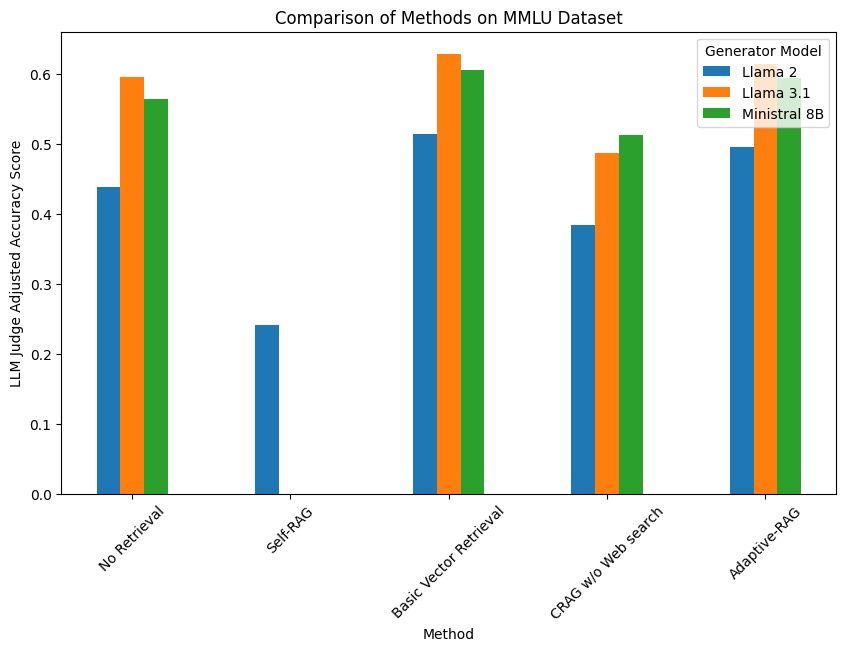

Number of records in model_df:  5
f1_scores: [0.6350056369785795, 0.366967305524239, 0.6617812852311161, 0.4498308906426155, 0.6603720405862458]
Number of records in model_df:  5
f1_scores: [0.8509019165727171, 0, 0.8441375422773394, 0.5496054114994363, 0.8399098083427283]
Number of records in model_df:  4
f1_scores: [0.8554114994363021, 0, 0.8342728297632469, 0.6178128523111612, 0.8286358511837655]


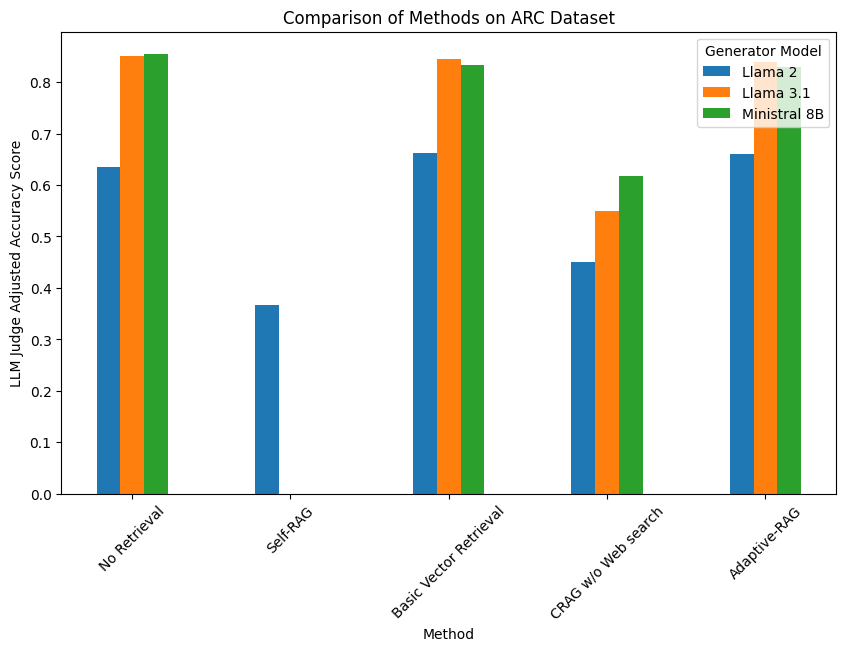

Number of records in model_df:  5
f1_scores: [0.2644237265234427, 0.2566946172572356, 0.2911597729115977, 0.2794376098418277, 0.2896728845633955]
Number of records in model_df:  5
f1_scores: [0.292607109068793, 0, 0.2315590380978114, 0.2442913119848669, 0.3407217191512366]
Number of records in model_df:  4
f1_scores: [0.2675142007032729, 0, 0.352027027027027, 0.3767743679870217, 0.3421230561189993]


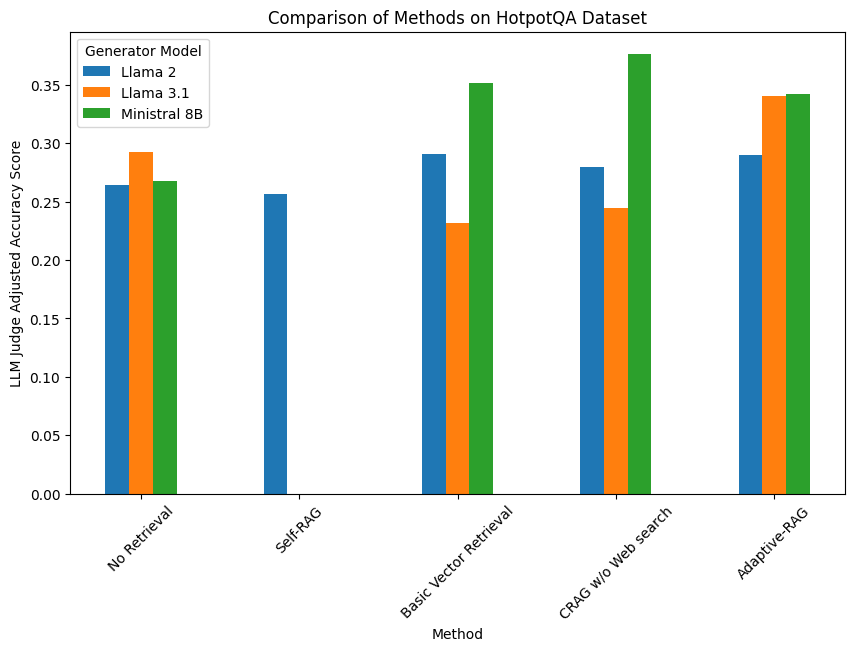

Number of records in model_df:  5
f1_scores: [0.268771874005727, 0.2777821971203564, 0.2504775549188157, 0.2186405603311047, 0.2523870146403564]
Number of records in model_df:  5
f1_scores: [0.2466189339697693, 0, 0.0910898965791567, 0.0938668363694216, 0.2715843081085382]
Number of records in model_df:  4
f1_scores: [0.2424821002386634, 0, 0.3004377238360525, 0.3244769708058229, 0.296101829753381]


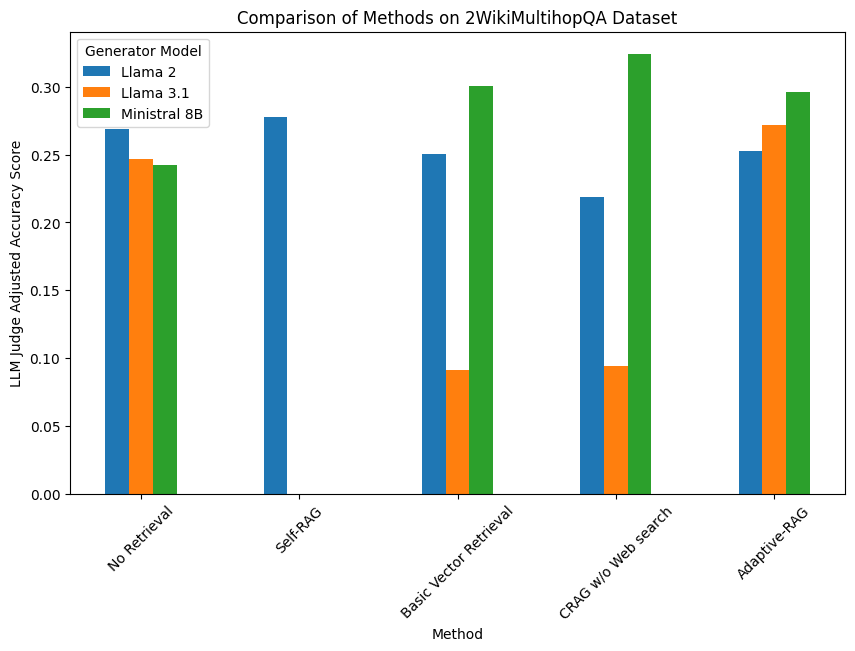

Number of records in model_df:  5
f1_scores: [0.232249502322495, 0.192435301924353, 0.305242203052422, 0.399734395750332, 0.2999336429993364]
Number of records in model_df:  7
f1_scores: [0.4505640345056403, 0, 0.291970802919708, 0.4963503649635036, 0.2859986728599867]
Number of records in model_df:  4
f1_scores: [0.1386861313868613, 0, 0.3828798938287989, 0.4479097544790975, 0.3875248838752488]


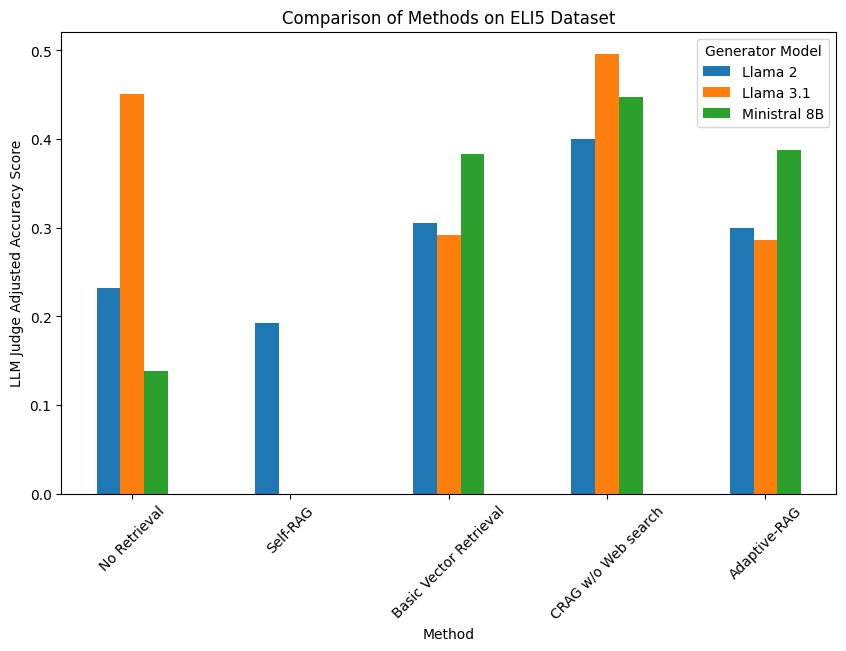

Number of records in model_df:  5
f1_scores: [0.2278106508875739, 0.2509252405625463, 0.3920916481892091, 0.3795269770879527, 0.3784183296378418]
Number of records in model_df:  7
f1_scores: [0.3049907578558225, 0, 0.4480591497227357, 0.4282544378698225, 0.4279379157427938]
Number of records in model_df:  4
f1_scores: [0.2094744633604737, 0, 0.4198078344419808, 0.4083518107908351, 0.3887657058388766]


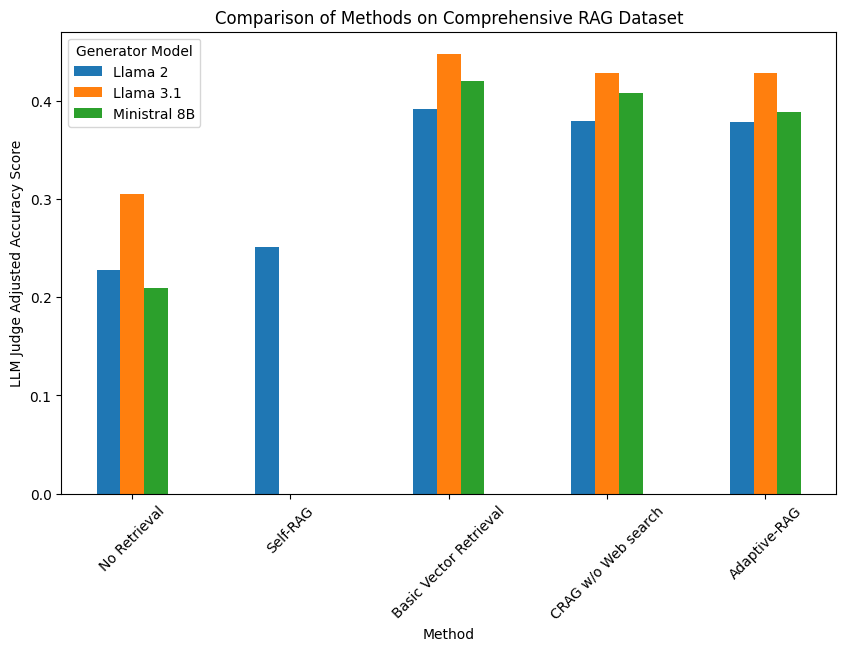

Number of records in model_df:  2
f1_scores: [0.6161616161616161, 0.4444444444444444]


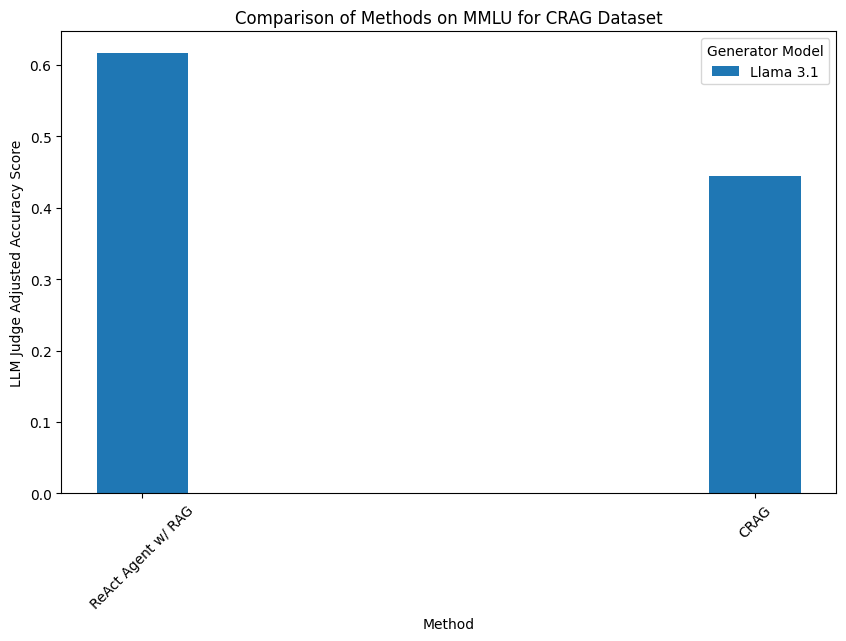

Number of records in model_df:  38
f1_scores: [0.1212121212121212, 0.51, 0.45]


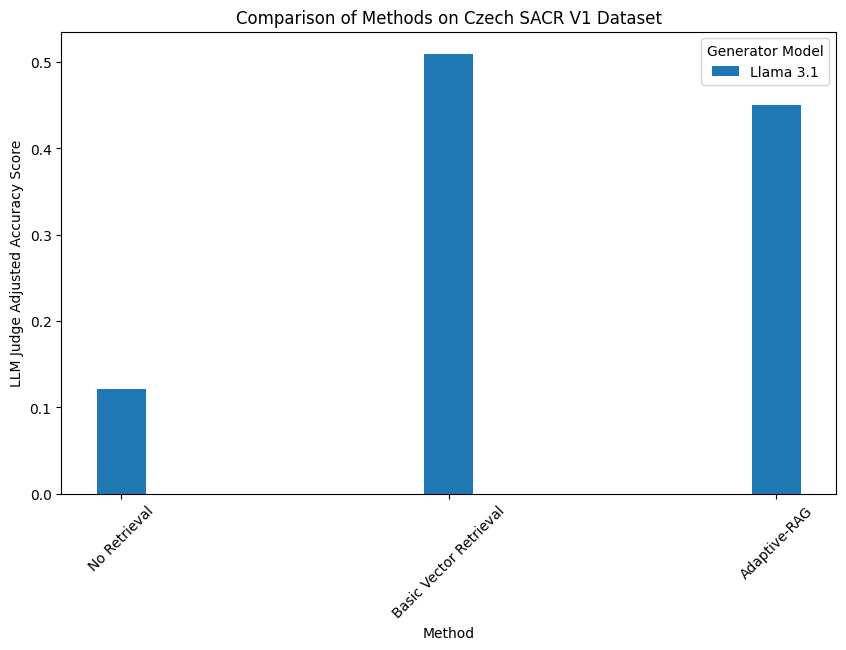

Number of records in model_df:  11
f1_scores: [0, 0.195, 0.2, 0, 0.33, 0.32, 0, 0, 0, 0, 0, 0, 0, 0, 0.14, 0.19, 0, 0, 0, 0.46, 0.47, 0.485, 0.235, 0.215, 0]
Number of records in model_df:  220
f1_scores: [0.2964824120603015, 0.3115577889447236, 0.3065326633165829, 0.3115577889447236, 0, 0, 0.5728643216080402, 0.6030150753768844, 0.775, 0.2626262626262626, 0.3768844221105528, 0.5102040816326531, 0.36, 0.38, 0.4170854271356783, 0.457286432160804, 0.3131313131313131, 0.395, 0.4874371859296482, 0.5879396984924623, 0.6180904522613065, 0.65, 0.325, 0.3316582914572864, 0.55]
Number of records in model_df:  10
f1_scores: [0, 0.245, 0.245, 0, 0, 0, 0, 0.42, 0, 0, 0, 0, 0, 0, 0.325, 0.475, 0, 0, 0, 0.46, 0.47, 0.415, 0.25, 0.255, 0]


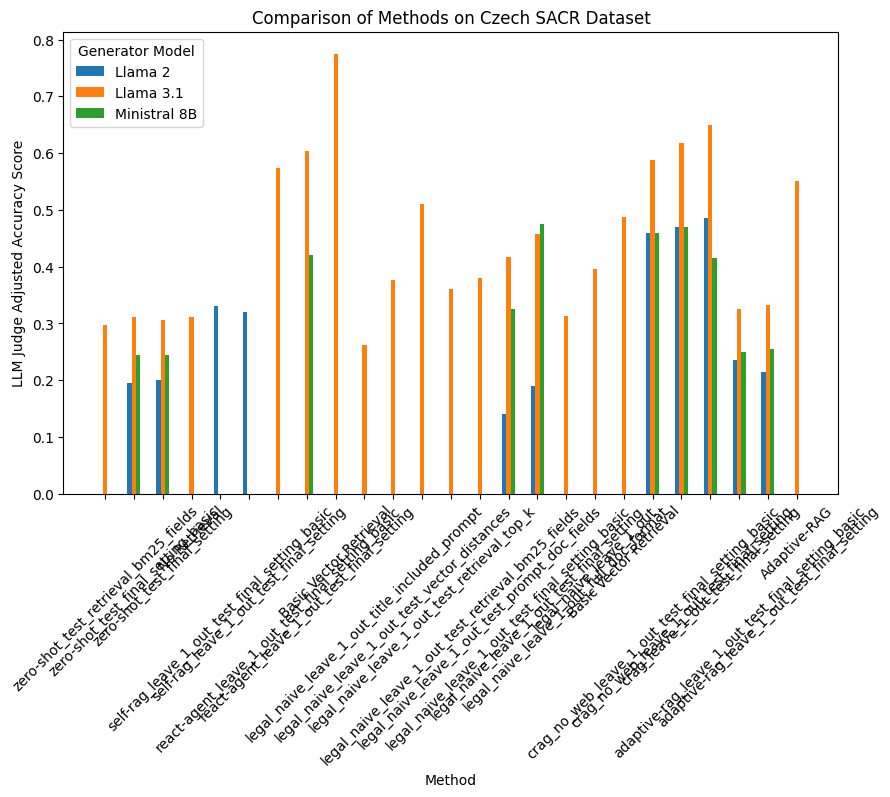

In [65]:
# Create a grouped bar chart where each method has multiple bars, one for each model

import numpy as np
import matplotlib.pyplot as plt

# metric_name = "llm_judge_matcher_accuracy"
metric_name = "llm_judge_matcher_adjusted_accuracy"
# metric_name = "ground_truths_extract_success_rate"
# metric_name = "llm_judge_matcher_success_rate"
# metric_name = "llm_judge_matcher_accuracy_category_legal_interpretation"
pretty_metric_name = metric_name_map[metric_name]
# metric_name = "avg_retrieval_calls"
# pretty_metric_name = "avg_retrieval_calls"

for dataset in datasets:

    mmlu_df = df[df["dataset_name"] == dataset]

    methods = mmlu_df["method"].unique()
    methods = sorted(methods, reverse=True)
    models = sorted(mmlu_df["generator_model"].unique())

    x = np.arange(len(methods))  # Position of each method on the x-axis
    width = 0.15  # Width of each bar

    fig, ax = plt.subplots(figsize=(10, 6))

    # Create bars for each model within each method group
    for i, model in enumerate(models):
        model_df = mmlu_df[mmlu_df["generator_model"] == model]
        print("Number of records in model_df: ", len(model_df))
        f1_scores = [model_df[model_df["method"] == method][metric_name].values[0] if method in model_df["method"].values else 0 for method in methods]
        print(f"f1_scores: {f1_scores}")
        pretty_model = model_name_map.get(model)
        ax.bar(x + i * width, f1_scores, width, label=pretty_model)

    # Formatting
    ax.set_xlabel("Method")
    ax.set_ylabel(f"{pretty_metric_name} Score")
    dataset_pretty = dataset_name_map.get(dataset)
    ax.set_title(f"Comparison of Methods on {dataset_pretty} Dataset")
    ax.set_xticks(x + width * (len(models) / 2 - 0.5))
    pretty_methods = [method_name_map.get(method, method) for method in methods]
    ax.set_xticklabels(pretty_methods, rotation=45)  # Rotate labels for better readability
    ax.legend(title="Generator Model")

    # plt.savefig(f"/Users/jakubkucera-sch/Documents/diplomka/2025BP_Kucera_RAG_LLM/images/generated_images/flashrag_eva_{dataset}_{metric_name}.pdf", bbox_inches='tight')

    plt.show()

    # TODO separate chunking methods use index_path / corpus_path

In [13]:
# filter by comprehensive_rag dataset
crag_corpuses = df[df["dataset_name"] == 'comprehensive_rag']['corpus_path'].unique()
crag_corpuses

array(['/home/kucerj56/datasets/crag_data/flashrag_crag_unchunked_corpus_chunked.jsonl',
       '/home/kucerj56/datasets/crag_data/flashrag_crag_chunked_corpus.jsonl'],
      dtype=object)

In [14]:
import pandas as pd

# List your target datasets
datasets = ['mmlu', 'arc', 'hotpotqa', '2wikimultihopqa', 'eli5', 'comprehensive_rag']



# Subset once
subset = df[df["dataset_name"].isin(datasets)]

# remove rows with corpus_path = "/home/kucerj56/datasets/crag_data/flashrag_crag_chunked_corpus.jsonl"
subset = subset[subset["corpus_path"] != "/home/kucerj56/datasets/crag_data/flashrag_crag_chunked_corpus.jsonl"]

# Remove duplicates, keeping the first row of each group
unique_subset = subset.drop_duplicates(
    subset=["method", "generator_model", "dataset_name"],
    keep="first"
)

# Optionally, reset the index if you want a clean new index
unique_subset = unique_subset.reset_index(drop=True)

# print(unique_subset)


# Pivot: rows = (method, model), cols = dataset, values = metric
pivot = unique_subset.pivot(
    index=["method", "generator_model"],
    columns="dataset_name",
    values=metric_name
)

# Sort methods (outer level) and models (inner level) as desired
pivot = pivot.sort_index(level=[0,1], ascending=[False, True])

# Rename row‐index and columns for prettier output
# Flatten multiindex columns so we can rename them, then restore MultiIndex
pivot.columns = [dataset_name_map.get(ds, ds) for ds in pivot.columns]
dataset_short_name_map = {
    '2WikiMultihopQA': "WikiHop"
}
pivot.columns = [dataset_short_name_map.get(ds, ds) for ds in pivot.columns]
pivot.index = pd.MultiIndex.from_tuples(
    [(method_name_map.get(m, m), model_name_map.get(gm, gm))
     for m, gm in pivot.index],
    names=["Method", "Generator Model"]
)

# Optionally, group rows by Method (will naturally appear as blocks in LaTeX)
# Finally, generate LaTeX
# latex_table = pivot.to_latex(
#     multirow=True,                  # collapse identical Method cells
#     index_names=True,
#     na_rep="--",                    # how to show missing entries
#     float_format="%.3f",            # metric precision
#     caption=f"{pretty_metric_name} across methods, models, and datasets",
#     label="tab:metrics_summary",
#     column_format="ll" + "r" * len(pivot.columns)  # two left cols + right‐aligned metrics
# )
latex_table = pivot.to_latex(
    # drop multirow, or
    multirow=False,
    # or add booktabs=False to force \hline instead of \cline
    # booktabs=False,
    index_names=True,
    na_rep="--",
    float_format="%.3f",
    caption=f"{pretty_metric_name} across methods, models, and datasets",
    label="tab:metrics_summary",
    column_format="ll" + "r" * len(pivot.columns)
)

print(latex_table)


\begin{table}
\caption{LLM Judge Adjusted Accuracy across methods, models, and datasets}
\label{tab:metrics_summary}
\begin{tabular}{llrrrrrr}
\toprule
 &  & WikiHop & ARC & Comprehensive RAG & ELI5 & HotpotQA & MMLU \\
Method & Generator Model &  &  &  &  &  &  \\
\midrule
No Retrieval & Llama 2 & 0.269 & 0.635 & 0.228 & 0.232 & 0.264 & 0.438 \\
 & Llama 3.1 & 0.247 & 0.851 & 0.305 & 0.451 & 0.293 & 0.595 \\
 & Ministral 8B & 0.242 & 0.855 & 0.209 & 0.139 & 0.268 & 0.564 \\
Self-RAG & Llama 2 & 0.278 & 0.367 & 0.251 & 0.192 & 0.257 & 0.242 \\
Basic Vector Retrieval & Llama 2 & 0.250 & 0.662 & 0.392 & 0.305 & 0.291 & 0.514 \\
 & Llama 3.1 & 0.091 & 0.844 & 0.448 & 0.292 & 0.232 & 0.629 \\
 & Ministral 8B & 0.300 & 0.834 & 0.420 & 0.383 & 0.352 & 0.605 \\
CRAG w/o Web search & Llama 2 & 0.219 & 0.450 & 0.380 & 0.400 & 0.279 & 0.384 \\
 & Llama 3.1 & 0.094 & 0.550 & 0.428 & 0.496 & 0.244 & 0.486 \\
 & Ministral 8B & 0.324 & 0.618 & 0.408 & 0.448 & 0.377 & 0.513 \\
Adaptive-RAG & Llama 2 

In [15]:
# # 1) Group & find the duplicate‐index lists (as before)
# # Remove duplicates, keeping the first row of each group
# unique_subset = subset.drop_duplicates(
#     subset=["method", "generator_model", "dataset_name"],
#     keep="first"
# )
#
# # Optionally, reset the index if you want a clean new index
# unique_subset = unique_subset.reset_index(drop=True)
#
# # print(unique_subset)
#
#
#
# dup_groups = unique_subset.groupby(
#     ["method", "generator_model", "dataset_name"]
# ).apply(lambda grp: grp.index.tolist())
#
# dup_groups = dup_groups[dup_groups.map(len) > 1]
#
# # 2) Flatten all of the duplicate indices into one list
# dup_indices = [idx for idx_list in dup_groups for idx in idx_list]
#
# # 3) Filter the original DataFrame to just those rows
# duplicated_rows = unique_subset.loc[dup_indices]
#
# duplicated_rows


In [16]:
 # filter out records with method = "legal_naive_leave_1_out_test_retrieval_bm25_fields" and sort it by "llm_judge_matcher_adjusted_accuracy"
# df[df["method"] == "legal_naive_leave_1_out_test_retrieval_bm25_fields" | df["method"] == "zero-shot_test_retrieval_bm25_fields"].sort_values("llm_judge_matcher_adjusted_accuracy", ascending=False)[["llm_judge_matcher_adjusted_accuracy", "weaviate_query_properties", "weaviate_alpha"]]
# df_query_params = df[df["method"] == "legal_naive_leave_1_out_test_retrieval_bm25_fields"][df["weaviate_collection_name"] == "NSS_corpus_full_for_test_COSINE"].sort_values("llm_judge_matcher_adjusted_accuracy", ascending=False)[["llm_judge_matcher_adjusted_accuracy", "weaviate_query_properties", "weaviate_alpha", "weaviate_collection_name"]]
df_query_params = df[df["method"] == "legal_naive_leave_1_out_test_retrieval_bm25_fields"][df["weaviate_collection_name"] != "NSS_corpus_full_for_test_COSINE"].sort_values("llm_judge_matcher_adjusted_accuracy", ascending=False)[["llm_judge_matcher_adjusted_accuracy", "weaviate_query_properties", "weaviate_alpha", "weaviate_collection_name"]]
# df_query_params = df[df["method"] == "legal_naive_leave_1_out_test_retrieval_bm25_fields"].sort_values("llm_judge_matcher_adjusted_accuracy", ascending=False)[["llm_judge_matcher_adjusted_accuracy", "weaviate_query_properties", "weaviate_alpha", "weaviate_collection_name"]]

# df_query_params = df_query_params[df_query_params["weaviate_alpha"] == 0.0]

df_query_params = df_query_params[:30]

df_query_params
# TODO after 0.8, make a sorted bar chart, also split by alpha, like with models
# include result with nss_v2_2025_04_13_15_04_zero-shot_test_retrieval_bm25_fields

/var/folders/gm/6zjcwbd164d1v4gmx73009pr0000gp/T/ipykernel_25197/1482438589.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_query_params = df[df["method"] == "legal_naive_leave_1_out_test_retrieval_bm25_fields"][df["weaviate_collection_name"] != "NSS_corpus_full_for_test_COSINE"].sort_values("llm_judge_matcher_adjusted_accuracy", ascending=False)[["llm_judge_matcher_adjusted_accuracy", "weaviate_query_properties", "weaviate_alpha", "weaviate_collection_name"]]


,llm_judge_matcher_adjusted_accuracy,weaviate_query_properties,weaviate_alpha,weaviate_collection_name
147,0.412060,['contents_lemmas'],0.5,NSS_corpus_full_for_test
184,0.411168,"['contents_lemmas', 'referenced_paragraphs', '...",0.0,NSS_corpus_full_for_test_DOT_PRODUCT
146,0.405000,['contents_lemmas'],0.0,NSS_corpus_full_for_test
167,0.404040,['contents'],0.8,NSS_corpus_full_for_test_DOT_PRODUCT
204,0.383838,"['contents_lemmas', 'referenced_paragraphs', '...",0.8,NSS_corpus_full_for_test_DOT_PRODUCT
166,0.383838,['contents_lemmas'],0.8,NSS_corpus_full_for_test_DOT_PRODUCT
196,0.381910,"['name_lemmas', 'contents_lemmas']",0.5,NSS_corpus_full_for_test_DOT_PRODUCT
187,0.373737,"['name_lemmas', 'contents_lemmas', 'referenced...",0.0,NSS_corpus_full_for_test_DOT_PRODUCT
170,0.370000,['referenced_entities'],0.8,NSS_corpus_full_for_test_DOT_PRODUCT
168,0.370000,['verdict'],0.8,NSS_corpus_full_for_test_DOT_PRODUCT


In [17]:
# for i, row in df_query_params.iterrows():
#     score = row["llm_judge_matcher_adjusted_accuracy"]
#     alpha = row["weaviate_alpha"]
#     query_properties = row["weaviate_query_properties"]
#     weaviate_collection_name = row["weaviate_collection_name"]

In [18]:
import pandas as pd

# -------- helper ----------------------------------------------------------
def escape_latex(text: str) -> str:
    """Escape a few common LaTeX-special characters."""
    special = {
        "\\": r"\textbackslash{}",
        "&":  r"\&",
        "%":  r"\%",
        "$":  r"\$",
        "#":  r"\#",
        "_":  r"\_",
        "{":  r"\{",
        "}":  r"\}",
        "~":  r"\textasciitilde{}",
        "^":  r"\textasciicircum{}",
    }
    for char, repl in special.items():
        text = text.replace(char, repl)
    return text

# -------- LaTeX table generation -----------------------------------------
lines = []
lines.append(r"\begin{center}")
lines.append(r"\begin{tabular}{| m{1.5cm} | m{0.6cm} | m{10cm} |}")
lines.append(r"    \hline")
lines.append(r"    Accuracy & $\alpha$ & Query properties \\")
lines.append(r"    \hline")
lines.append(r"    \hline")

for _, row in df_query_params.iterrows():
    score = f"{row['llm_judge_matcher_adjusted_accuracy']:.3f}"
    alpha = row["weaviate_alpha"]
    props = row["weaviate_query_properties"]
    props = props.replace("[", "").replace("]", "").replace("'", "")

    props_text = ", ".join(props) if isinstance(props, (list, tuple)) else str(props)

    score_tex = escape_latex(score)
    alpha_tex = escape_latex(str(alpha))
    props_tex = escape_latex(props_text)

    lines.append(f"    {score_tex} & {alpha_tex} & {props_tex} \\\\")
    lines.append(r"    \hline")

lines.append(r"\end{tabular}")
lines.append(r"\end{center}")

# -------- print result ----------------------------------------------------
latex_table = "\n".join(lines)
print(latex_table)


\begin{center}
\begin{tabular}{| m{1.5cm} | m{0.6cm} | m{10cm} |}
    \hline
    Accuracy & $\alpha$ & Query properties \\
    \hline
    \hline
    0.412 & 0.5 & contents\_lemmas \\
    \hline
    0.411 & 0.0 & contents\_lemmas, referenced\_paragraphs, referenced\_entities \\
    \hline
    0.405 & 0.0 & contents\_lemmas \\
    \hline
    0.404 & 0.8 & contents \\
    \hline
    0.384 & 0.8 & contents\_lemmas, referenced\_paragraphs, referenced\_entities \\
    \hline
    0.384 & 0.8 & contents\_lemmas \\
    \hline
    0.382 & 0.5 & name\_lemmas, contents\_lemmas \\
    \hline
    0.374 & 0.0 & name\_lemmas, contents\_lemmas, referenced\_entities \\
    \hline
    0.370 & 0.8 & referenced\_entities \\
    \hline
    0.370 & 0.8 & verdict \\
    \hline
    0.369 & 0.5 & contents\_lemmas, referenced\_entities \\
    \hline
    0.367 & 0.8 & referenced\_paragraphs \\
    \hline
    0.365 & 0.8 & name \\
    \hline
    0.365 & 0.8 & name\_lemmas, referenced\_paragraphs \\
    \hline
    

Number of records in df_query_params:  30
Number of records in model_df:  101


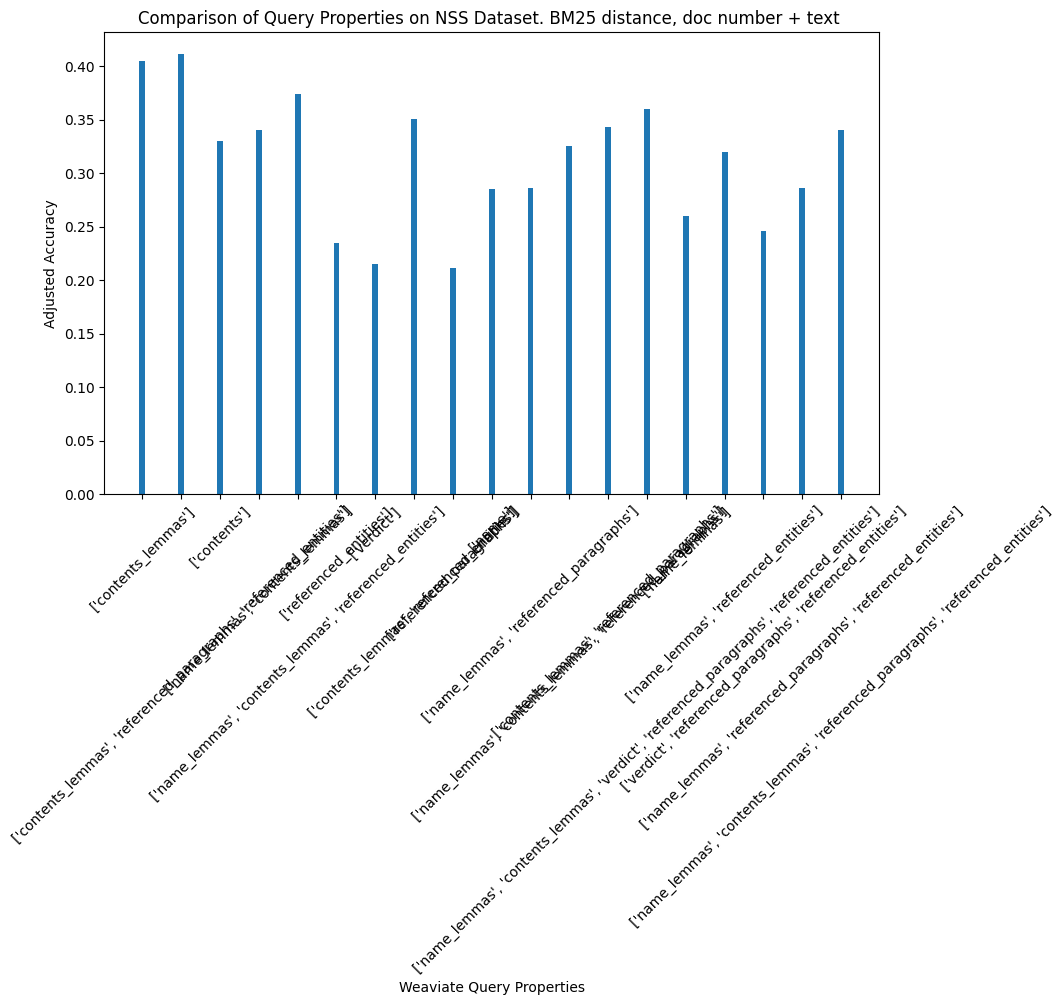

In [19]:
alpha_query_values = df_query_params['weaviate_alpha'].unique()
alpha_query_values
weaviate_query_properties = df_query_params['weaviate_query_properties'].unique()
weaviate_query_properties

x = np.arange(len(weaviate_query_properties))
width = 0.15  # Width of each bar
fig, ax = plt.subplots(figsize=(10, 6))
print("Number of records in df_query_params: ", len(df_query_params))
# model_df = df[df["generator_model"] == "llama_3.1"]
model_df = df[df["method"] == "legal_naive_leave_1_out_test_retrieval_bm25_fields"]
print("Number of records in model_df: ", len(model_df))
# model_df = df
# TODO add separate columns by distance (/collection). If not specified, put DOT
scores = [model_df[model_df["weaviate_query_properties"] == alpha][metric_name].values[0] if alpha in model_df["weaviate_query_properties"].values else 0 for alpha in weaviate_query_properties]
ax.bar(x, scores, width, label="llama_3.1")
# ax.bar(x, scores, label="llama_3.1")
# Formatting
ax.set_xlabel("Weaviate Query Properties")
ax.set_ylabel("Adjusted Accuracy")
ax.set_title(f"Comparison of Query Properties on NSS Dataset. BM25 distance, doc number + text ")
ax.set_xticks(x)
ax.set_xticklabels(weaviate_query_properties, rotation=45)  # Rotate labels for better readability
# ax.legend(title="Generator Model")

# plt.savefig(f"/Users/jakubkucera-sch/Documents/diplomka/2025BP_Kucera_RAG_LLM/images/generated_images/flashrag_eva_{dataset}_{metric_name}_query_params_experiment.pdf", bbox_inches='tight')
plt.show()


In [20]:
alpha_values = df["weaviate_alpha"].unique()
alpha_values_num = [float(a) for a in alpha_values]
alpha_values_num = [num for num in alpha_values_num if pd.isna(num) == False]
alpha_values_num = sorted(alpha_values_num)

In [80]:
weav_collection = df["weaviate_collection_name"].unique()
weav_collection

array([nan, 'NSS_corpus_full_for_test', 'NSS_corpus_full_for_test_COSINE',
       'NSS_corpus_full_for_test_L2_SQUARED',
       'NSS_corpus_full_for_test_DOT_PRODUCT',
       'NSS_corpus_full_for_test_MANHATTAN',
       'NSS_corpus_full_for_test_HAMMING'], dtype=object)

In [81]:
df[df["weaviate_collection_name"] == "NSS_corpus_full_for_test_HAMMING"]

,generator_model,dataset_name,split,save_dir,method,corpus_path,index_path,weaviate_alpha,use_weaviate,retrieval_model_path,...,llm_judge_matcher_adjusted_accuracy,llm_judge_matcher_success_rate,ground_truths_extract_success_rate,llm_judge_matcher_accuracy_category_legal_interpretation,llm_judge_matcher_accuracy_category_reasoning,llm_judge_matcher_accuracy_category_procedure,llm_judge_matcher_accuracy_category_factual,llm_judge_matcher_accuracy_category_practical,llm_judge_matcher_accuracy_category_credibility,llm_judge_matcher_accuracy_category_summary
160,llama31-8B-instruct,nss_v2,['test'],output/nss_v2_2025_04_13_12_36_legal_naive_lea...,legal_naive_leave_1_out_test_vector_distances,/home/kucerj56/datasets/nss/nss_chunked_lemmat...,/home/kucerj56/datasets/index/nss_chunked_lemm...,1.0,True,/home/kucerj56/models/intfloat/multilingual-e5...,...,0.34,1.0,1.0,0.338384,NaN,0.5,NaN,NaN,NaN,NaN


Number of records in model_df:  11


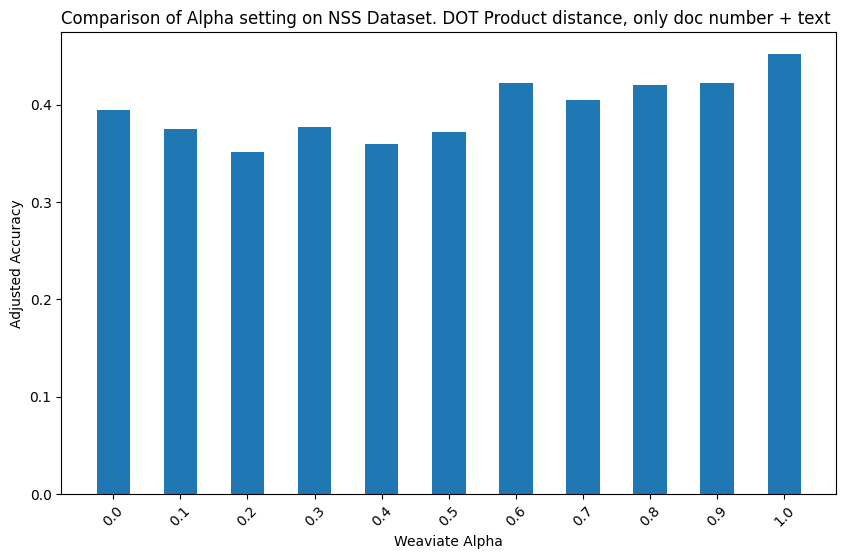

In [21]:
# make a bar plot of the "llm_judge_matcher_adjusted_accuracy" for each legal_naive_leave_1_out method for the llama31 model. On the x axis will be the "weaviate_alpha" PROPERTY IN sorted order

metric_name = "llm_judge_matcher_adjusted_accuracy"

x = np.arange(len(alpha_values_num))  # Position of each method on the x-axis
width = 0.50  # Width of each bar
fig, ax = plt.subplots(figsize=(10, 6))
# model_df = df[df["generator_model"] == "llama_3.1"]
model_df = df[df["method"] == "legal_naive_leave_1_out"]
# model_df = df`
print("Number of records in model_df: ", len(model_df))
# model_df = df

# TODO add separate columns by distance (/collection). If not specified, put DOT

scores = [model_df[model_df["weaviate_alpha"] == alpha][metric_name].values[0] if alpha in model_df["weaviate_alpha"].values else 0 for alpha in alpha_values_num]
ax.bar(x, scores, width, label="llama_3.1")
# ax.bar(x, scores, label="llama_3.1")
# Formatting
ax.set_xlabel("Weaviate Alpha")
ax.set_ylabel("Adjusted Accuracy")
ax.set_title(f"Comparison of Alpha setting on NSS Dataset. DOT Product distance, only doc number + text ")
ax.set_xticks(x)
ax.set_xticklabels(alpha_values_num, rotation=45)  # Rotate labels for better readability
# ax.legend(title="Generator Model")
plt.show()


Number of records in model_df:  11


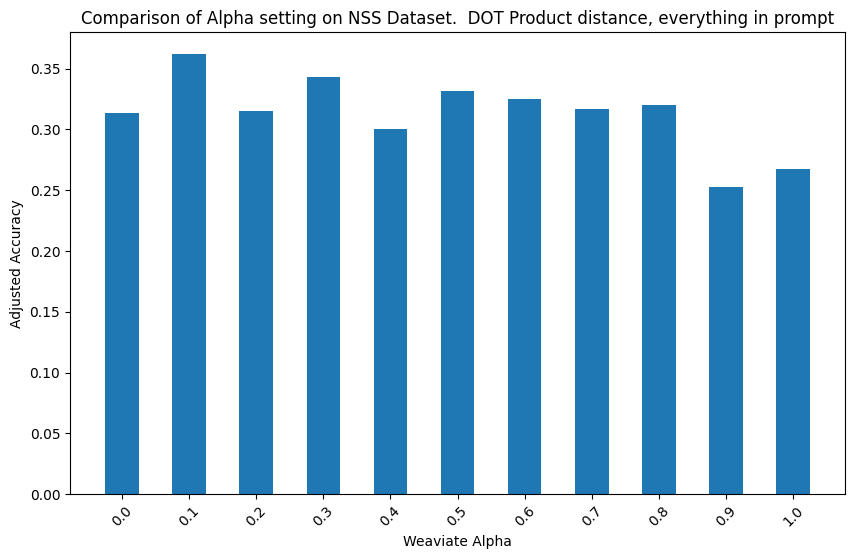

In [83]:
# make a bar plot of the "llm_judge_matcher_adjusted_accuracy" for each legal_naive_leave_1_out method for the llama31 model. On the x axis will be the "weaviate_alpha" PROPERTY IN sorted order

metric_name = "llm_judge_matcher_adjusted_accuracy"

x = np.arange(len(alpha_values_num))  # Position of each method on the x-axis
width = 0.50  # Width of each bar
fig, ax = plt.subplots(figsize=(10, 6))
# model_df = df[df["generator_model"] == "llama_3.1"]
model_df = df[df["method"] == "legal_naive_leave_1_out_full_doc_format"]
print("Number of records in model_df: ", len(model_df))
# model_df = df

scores = [model_df[model_df["weaviate_alpha"] == alpha][metric_name].values[0] if alpha in model_df["weaviate_alpha"].values else 0 for alpha in alpha_values_num]
ax.bar(x, scores, width, label="llama_3.1")
# ax.bar(x, scores, label="llama_3.1")
# Formatting
ax.set_xlabel("Weaviate Alpha")
ax.set_ylabel("Adjusted Accuracy")
ax.set_title(f"Comparison of Alpha setting on NSS Dataset.  DOT Product distance, everything in prompt")
ax.set_xticks(x)
ax.set_xticklabels(alpha_values_num, rotation=45)  # Rotate labels for better readability
# ax.legend(title="Generator Model")

plt.savefig(f"/Users/jakubkucera-sch/Documents/diplomka/2025BP_Kucera_RAG_LLM/images/generated_images/flashrag_eva_{dataset}_{metric_name}_retrieval_top_k_experiment_BAD_DISTANCE.pdf", bbox_inches='tight')

plt.show()


Number of records in model_df:  11


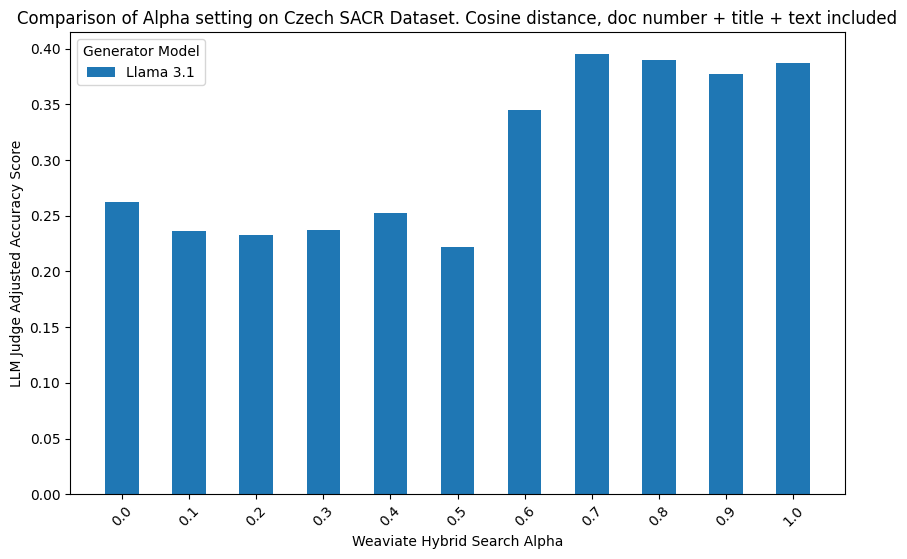

In [23]:

# alpha experiment, with COSINE distance metric

metric_name = "llm_judge_matcher_adjusted_accuracy"

x = np.arange(len(alpha_values_num))  # Position of each method on the x-axis
width = 0.50  # Width of each bar
fig, ax = plt.subplots(figsize=(10, 6))
# model_df = df[df["generator_model"] == "llama_3.1"]
model_df = df[df["method"] == "legal_naive_leave_1_out_title_included_prompt"]
dataset = "nss_v2"
dataset_pretty = dataset_name_map.get(dataset)
print("Number of records in model_df: ", len(model_df))
# model_df = df
model_pretty = model_name_map.get("llama31-8B-instruct")
scores = [model_df[model_df["weaviate_alpha"] == alpha][metric_name].values[0] if alpha in model_df["weaviate_alpha"].values else 0 for alpha in alpha_values_num]
ax.bar(x, scores, width, label=model_pretty)
# ax.bar(x, scores, label="llama_3.1")
# Formatting
ax.set_xlabel("Weaviate Hybrid Search Alpha")
ax.set_ylabel(f"{pretty_metric_name} Score")
ax.set_title(f"Comparison of Alpha setting on {dataset_pretty} Dataset. Cosine distance, doc number + title + text included")
ax.set_xticks(x)
ax.set_xticklabels(alpha_values_num, rotation=45)  # Rotate labels for better readability
ax.legend(title="Generator Model")

plt.savefig(f"/Users/jakubkucera-sch/Documents/diplomka/2025BP_Kucera_RAG_LLM/images/generated_images/flashrag_eva_{dataset}_{metric_name}_alpha_experiment.pdf", bbox_inches='tight')

plt.show()


In [24]:


# TODO legal_naive_leave_1_out_test_vector_distances

In [25]:
df_doc_prompt_params = df[df["method"] == "legal_naive_leave_1_out_test_prompt_doc_fields"].sort_values("llm_judge_matcher_adjusted_accuracy", ascending=False)[["llm_judge_matcher_adjusted_accuracy", "retrieved_document_prompt_properties", "weaviate_alpha", "weaviate_collection_name"]]

# df_doc_prompt_params = df_doc_prompt_params[:30]

df_doc_prompt_params



,llm_judge_matcher_adjusted_accuracy,retrieved_document_prompt_properties,weaviate_alpha,weaviate_collection_name
291,0.472362,"['contents', 'referenced_paragraphs']",0.8,NSS_corpus_full_for_test_COSINE
296,0.457286,['contents'],0.8,NSS_corpus_full_for_test_COSINE
282,0.440000,"['title', 'contents', 'referenced_entities']",0.8,NSS_corpus_full_for_test_COSINE
281,0.434343,"['title', 'contents', 'referenced_paragraphs']",0.8,NSS_corpus_full_for_test_COSINE
259,0.427136,"['number', 'title', 'contents', 'referenced_pa...",0.8,NSS_corpus_full_for_test_COSINE
289,0.396985,"['contents', 'verdict', 'possibility_of_appeal']",0.8,NSS_corpus_full_for_test_COSINE
276,0.391960,"['title', 'contents', 'verdict', 'right_to_com...",0.8,NSS_corpus_full_for_test_COSINE
262,0.391960,"['number', 'title', 'contents']",0.8,NSS_corpus_full_for_test_COSINE
273,0.390000,"['number', 'contents', 'possibility_of_appeal']",0.8,NSS_corpus_full_for_test_COSINE
272,0.385000,"['number', 'contents', 'right_to_compensation']",0.8,NSS_corpus_full_for_test_COSINE


In [26]:

import pandas as pd

# -------- helper ----------------------------------------------------------
def escape_latex(text: str) -> str:
    """Escape a few common LaTeX-special characters."""
    special = {
        "\\": r"\textbackslash{}",
        "&":  r"\&",
        "%":  r"\%",
        "$":  r"\$",
        "#":  r"\#",
        "_":  r"\_",
        "{":  r"\{",
        "}":  r"\}",
        "~":  r"\textasciitilde{}",
        "^":  r"\textasciicircum{}",
    }
    for char, repl in special.items():
        text = text.replace(char, repl)
    return text

# -------- LaTeX table generation -----------------------------------------
lines = []
lines.append(r"\begin{center}")
# lines.append(r"\begin{longtable}{| m{1.5cm} | m{0.8cm} | m{12cm} |}")
lines.append(r"\begin{longtable}{| m{1.5cm} | m{11cm} |}")
# lines.append(r"\begin{tabular}{| m{1.5cm} | m{11cm} |}")
lines.append(r"    \hline")
# lines.append(r"    Accuracy & $\alpha$ & Document prompt properties \\")
lines.append(r"    Accuracy & Document prompt properties \\")
lines.append(r"    \hline")
lines.append(r"    \hline")

for _, row in df_doc_prompt_params.iterrows():
    score = f"{row['llm_judge_matcher_adjusted_accuracy']:.3f}"
    alpha = row["weaviate_alpha"]
    props = row["retrieved_document_prompt_properties"]
    props = props.replace("[", "").replace("]", "").replace("'", "")
    # props = props.split(", ")


    props_text = ", ".join(props) if isinstance(props, (list, tuple)) else str(props)

    score_tex = escape_latex(score)
    alpha_tex = escape_latex(str(alpha))
    props_tex = escape_latex(props_text)

    # lines.append(f"    {score_tex} & {alpha_tex} & {props_tex} \\\\")
    lines.append(f"    {score_tex} & {props_tex} \\\\")
    lines.append(r"    \hline")

lines.append(r"\end{longtable}")
# lines.append(r"\end{tabular}")
lines.append(r"\end{center}")

# -------- print result ----------------------------------------------------
latex_table = "\n".join(lines)
print(latex_table)


\begin{center}
\begin{longtable}{| m{1.5cm} | m{11cm} |}
    \hline
    Accuracy & Document prompt properties \\
    \hline
    \hline
    0.472 & contents, referenced\_paragraphs \\
    \hline
    0.457 & contents \\
    \hline
    0.440 & title, contents, referenced\_entities \\
    \hline
    0.434 & title, contents, referenced\_paragraphs \\
    \hline
    0.427 & number, title, contents, referenced\_paragraphs \\
    \hline
    0.397 & contents, verdict, possibility\_of\_appeal \\
    \hline
    0.392 & title, contents, verdict, right\_to\_compensation, possibility\_of\_appeal, referenced\_entities, referenced\_paragraphs \\
    \hline
    0.392 & number, title, contents \\
    \hline
    0.390 & number, contents, possibility\_of\_appeal \\
    \hline
    0.385 & number, contents, right\_to\_compensation \\
    \hline
    0.384 & number, contents, referenced\_paragraphs \\
    \hline
    0.382 & number, contents \\
    \hline
    0.382 & number, contents, verdict \\
    \hline
   

In [27]:
retrieval_top_k_values = sorted(df["retrieval_topk"].unique())

Number of records in model_df:  14


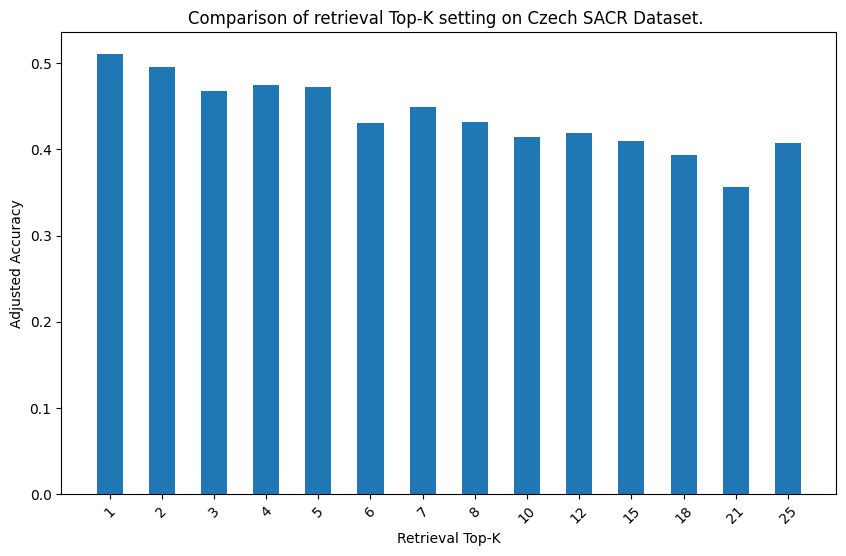

In [28]:


metric_name = "llm_judge_matcher_adjusted_accuracy"

dataset_pretty = dataset_name_map.get(dataset)

x = np.arange(len(retrieval_top_k_values))  # Position of each method on the x-axis
width = 0.50  # Width of each bar
fig, ax = plt.subplots(figsize=(10, 6))
# model_df = df[df["generator_model"] == "llama_3.1"]
model_df = df[df["method"] == "legal_naive_leave_1_out_test_retrieval_top_k"]
print("Number of records in model_df: ", len(model_df))
# model_df = df

scores = [model_df[model_df["retrieval_topk"] == alpha][metric_name].values[0] if alpha in model_df["retrieval_topk"].values else 0 for alpha in retrieval_top_k_values]
ax.bar(x, scores, width, label="llama_3.1")
# ax.bar(x, scores, label="llama_3.1")
# Formatting
ax.set_xlabel("Retrieval Top-K")
ax.set_ylabel("Adjusted Accuracy")
ax.set_title(f"Comparison of retrieval Top-K setting on {dataset_pretty} Dataset. ")
ax.set_xticks(x)
ax.set_xticklabels(retrieval_top_k_values, rotation=45)  # Rotate labels for better readability
# ax.legend(title="Generator Model")

plt.savefig(f"/Users/jakubkucera-sch/Documents/diplomka/2025BP_Kucera_RAG_LLM/images/generated_images/flashrag_eva_{dataset}_{metric_name}_retrieval_top_k_experiment.pdf", bbox_inches='tight')

plt.show()


In [39]:
final_setting_methods = ['zero-shot_test_final_setting',
       'self-rag_leave_1_out_test_final_setting',
       'legal_naive_leave_1_out_test_final_setting',
       'crag_leave_1_out_test_final_setting',
       'crag_no_web_leave_1_out_test_final_setting',
       'adaptive-rag_leave_1_out_test_final_setting',
       'react-agent_leave_1_out_test_final_setting',
                         ]

In [40]:
final_setting_methods_clean = [m.split("_test_final_setting")[0] for m in final_setting_methods]
final_setting_methods_clean = [m.split("_leave_1_out")[0] for m in final_setting_methods_clean]
final_setting_methods_clean

['zero-shot',
 'self-rag',
 'legal_naive',
 'crag',
 'crag_no_web',
 'adaptive-rag',
 'react-agent']

Number of records in model_df:  11
scores [0.2, 0.32, 0.19, 0.485, 0.47, 0.215, 0]
Number of records in model_df:  220
scores [0.3065326633165829, 0, 0.457286432160804, 0.65, 0.6180904522613065, 0.3316582914572864, 0.6030150753768844]
Number of records in model_df:  10
scores [0.245, 0, 0.475, 0.415, 0.47, 0.255, 0.42]


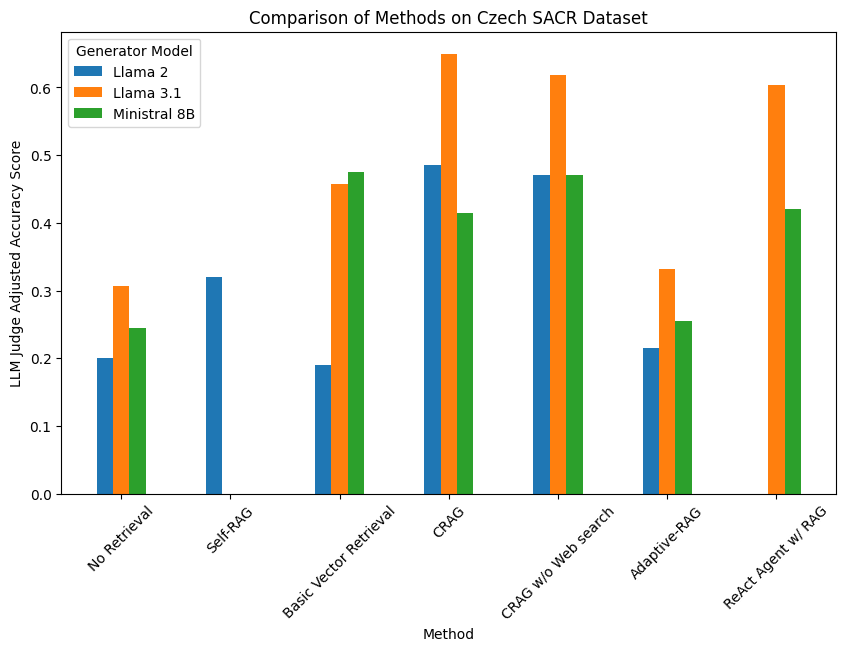

In [86]:
# Create a grouped bar chart where each method has multiple bars, one for each model

import numpy as np
import matplotlib.pyplot as plt

# metric_name = "llm_judge_matcher_accuracy"
metric_name = "llm_judge_matcher_adjusted_accuracy"
# metric_name = "ground_truths_extract_success_rate"
# metric_name = "llm_judge_matcher_success_rate"
# metric_name = "llm_judge_matcher_accuracy_category_legal_interpretation"

pretty_metric_name = metric_name_map[metric_name]

# metric_name = "avg_retrieval_calls"
# pretty_metric_name = "avg_retrieval_calls"


# for dataset in datasets:
for dataset in ['nss_v2']:

    mmlu_df = df[df["dataset_name"] == dataset]

    # final_setting_methods = mmlu_df["method"].unique()
    models = sorted(mmlu_df["generator_model"].unique())

    x = np.arange(len(final_setting_methods))  # Position of each method on the x-axis
    width = 0.15  # Width of each bar

    fig, ax = plt.subplots(figsize=(10, 6))

    # Create bars for each model within each method group
    for i, model in enumerate(models):
        model_df = mmlu_df[mmlu_df["generator_model"] == model]
        f1_scores = [model_df[model_df["method"] == method][metric_name].values[0] if method in model_df["method"].values else 0 for method in final_setting_methods]
        print("Number of records in model_df: ", len(model_df))
        print(f"scores {f1_scores}")
        model_pretty = model_name_map.get(model)
        ax.bar(x + i * width, f1_scores, width, label=model_pretty)

    # Formatting
    ax.set_xlabel("Method")
    ax.set_ylabel(f"{pretty_metric_name} Score")
    dataset_pretty = dataset_name_map.get(dataset)
    ax.set_title(f"Comparison of Methods on {dataset_pretty} Dataset")
    ax.set_xticks(x + width * (len(models) / 2 - 0.5))
    # ax.set_xticklabels(final_setting_methods, rotation=45)  # Rotate labels for better readability
    method_pretty = [method_name_map.get(method, method) for method in final_setting_methods_clean]
    ax.set_xticklabels(method_pretty, rotation=45)  # Rotate labels for better readability
    ax.legend(title="Generator Model")

    # plt.savefig(f"/Users/jakubkucera-sch/Documents/diplomka/2025BP_Kucera_RAG_LLM/images/generated_images/flashrag_eva_{dataset}_{metric_name}_final_setting_methods_w_weaviate.pdf", bbox_inches='tight')

    plt.show()

    # TODO separate chunking methods use index_path / corpus_path

Number of records in model_df:  5
[0.3768844221105528, 0.3668341708542713, 0.375, 0.355, 0.34]


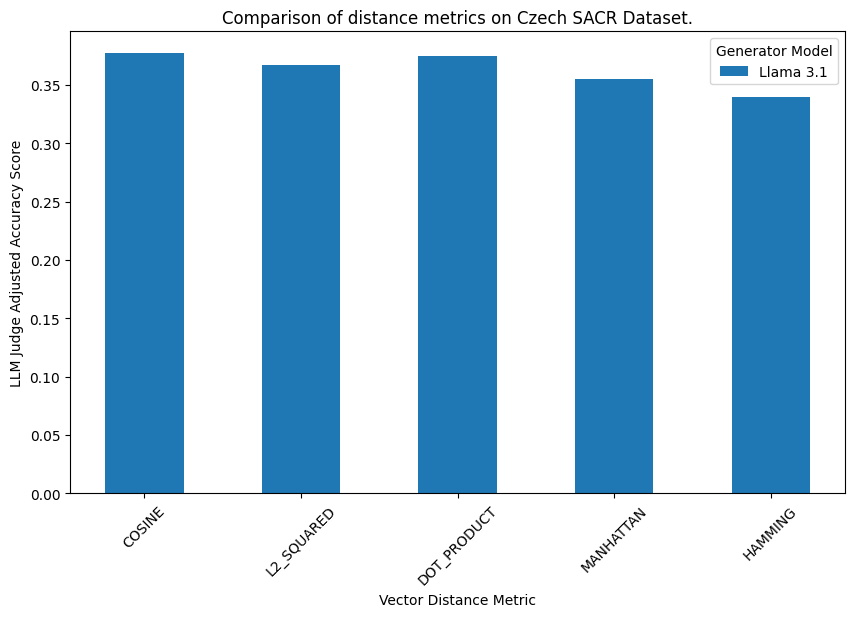

In [82]:
# compare legal_naive_leave_1_out_test_vector_distances



# alpha experiment, with COSINE distance metric

metric_name = "llm_judge_matcher_adjusted_accuracy"
pretty_metric_name = metric_name_map[metric_name]
model_df = df[df["method"] == "legal_naive_leave_1_out_test_vector_distances"]

distance_metrics = model_df["weaviate_collection_name"].unique()
distance_metrics_pretty = [d.split("NSS_corpus_full_for_test_")[-1] for d in distance_metrics]
distance_metrics_pretty

x = np.arange(len(distance_metrics))  # Position of each method on the x-axis
width = 0.50  # Width of each bar
fig, ax = plt.subplots(figsize=(10, 6))
print("Number of records in model_df: ", len(model_df))
# model_df = df
model_pretty = model_name_map.get("llama31-8B-instruct")
scores = [model_df[model_df["weaviate_collection_name"] == alpha][metric_name].values[0] if alpha in model_df["weaviate_collection_name"].values else 0 for alpha in distance_metrics]
print(scores)
ax.bar(x, scores, width, label=model_pretty)
# ax.bar(x, scores, label="llama_3.1")
# Formatting
ax.set_xlabel("Vector Distance Metric")
ax.set_ylabel(f"{pretty_metric_name} Score")
dataset_pretty = dataset_name_map.get(dataset)
ax.set_title(f"Comparison of distance metrics on {dataset_pretty} Dataset.")

ax.set_xticks(x)
ax.set_xticklabels(distance_metrics_pretty, rotation=45)  # Rotate labels for better readability
ax.legend(title="Generator Model")
plt.savefig(f"/Users/jakubkucera-sch/Documents/diplomka/2025BP_Kucera_RAG_LLM/images/generated_images/flashrag_eva_{dataset}_{metric_name}_distance_metrics_experiment.pdf", bbox_inches='tight')
plt.show()


In [56]:
final_setting_methods_basic = [
        'zero-shot_test_final_setting_basic',
       'self-rag_leave_1_out_test_final_setting_basic',
       'legal_naive_leave_1_out_test_final_setting_basic',
       'crag_no_web_leave_1_out_test_final_setting_basic',
       'adaptive-rag_leave_1_out_test_final_setting_basic',
       'react-agent_leave_1_out_test_final_setting_basic',
]

In [57]:
final_setting_methods_basic_clean = [m.split("_test_final_setting")[0] for m in final_setting_methods_basic]
final_setting_methods_basic_clean = [m.split("_leave_1_out")[0] for m in final_setting_methods_basic_clean]
final_setting_methods_basic_clean

['zero-shot',
 'self-rag',
 'legal_naive',
 'crag_no_web',
 'adaptive-rag',
 'react-agent']

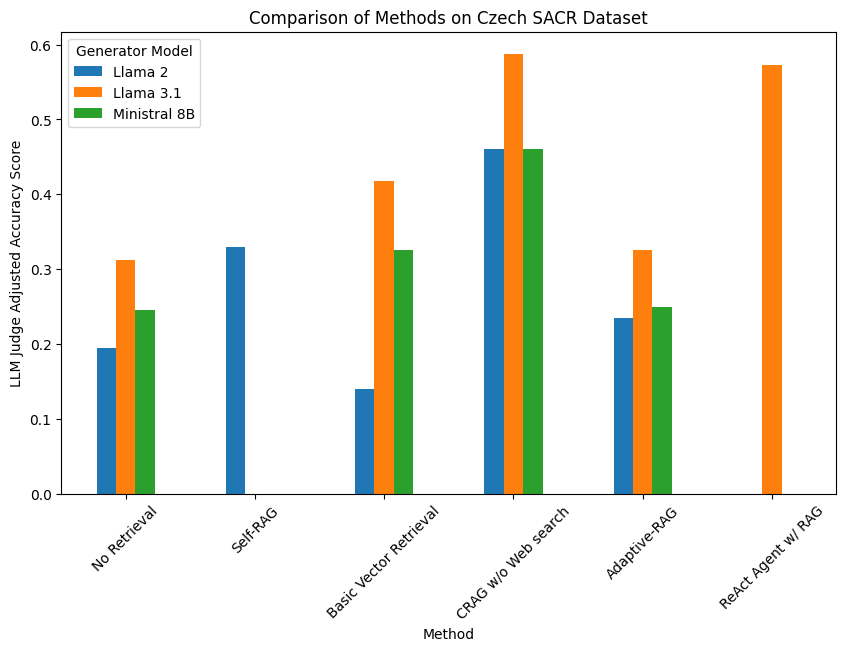

In [58]:
# Create a grouped bar chart where each method has multiple bars, one for each model

import numpy as np
import matplotlib.pyplot as plt

# metric_name = "llm_judge_matcher_accuracy"
metric_name = "llm_judge_matcher_adjusted_accuracy"
# metric_name = "ground_truths_extract_success_rate"
# metric_name = "llm_judge_matcher_success_rate"
# metric_name = "llm_judge_matcher_accuracy_category_legal_interpretation"

pretty_metric_name = metric_name_map[metric_name]

# for dataset in datasets:
for dataset in ['nss_v2']:

    mmlu_df = df[df["dataset_name"] == dataset]

    # final_setting_methods_basic = mmlu_df["method"].unique()
    models = sorted(mmlu_df["generator_model"].unique())

    x = np.arange(len(final_setting_methods_basic))  # Position of each method on the x-axis
    width = 0.15  # Width of each bar

    fig, ax = plt.subplots(figsize=(10, 6))

    # Create bars for each model within each method group
    for i, model in enumerate(models):
        model_df = mmlu_df[mmlu_df["generator_model"] == model]
        f1_scores = [model_df[model_df["method"] == method][metric_name].values[0] if method in model_df["method"].values else 0 for method in final_setting_methods_basic]
        model_pretty = model_name_map.get(model)
        ax.bar(x + i * width, f1_scores, width, label=model_pretty)

    # Formatting
    ax.set_xlabel("Method")
    ax.set_ylabel(f"{pretty_metric_name} Score")
    dataset_pretty = dataset_name_map.get(dataset)
    ax.set_title(f"Comparison of Methods on {dataset_pretty} Dataset")
    ax.set_xticks(x + width * (len(models) / 2 - 0.5))
    # ax.set_xticklabels(final_setting_methods_basic, rotation=45)  # Rotate labels for better readability
    method_pretty = [method_name_map.get(method, method) for method in final_setting_methods_basic_clean]
    ax.set_xticklabels(method_pretty, rotation=45)  # Rotate labels for better readability
    ax.legend(title="Generator Model")

    # plt.savefig(f"/Users/jakubkucera-sch/Documents/diplomka/2025BP_Kucera_RAG_LLM/images/generated_images/flashrag_eva_{dataset}_{metric_name}_final_setting_methods_basic_w_weaviate.pdf", bbox_inches='tight')

    plt.show()

    # TODO separate chunking methods use index_path / corpus_path

In [75]:
sub_df = df[df["dataset_name"] == 'nss_v2']
sub_df = sub_df[sub_df["method"] == 'legal_naive_leave_1_out']
# sub_df = sub_df[sub_df["method"] == 'zero-shot']
sub_df

,generator_model,dataset_name,split,save_dir,method,corpus_path,index_path,weaviate_alpha,use_weaviate,retrieval_model_path,...,llm_judge_matcher_adjusted_accuracy,llm_judge_matcher_success_rate,ground_truths_extract_success_rate,llm_judge_matcher_accuracy_category_legal_interpretation,llm_judge_matcher_accuracy_category_reasoning,llm_judge_matcher_accuracy_category_procedure,llm_judge_matcher_accuracy_category_factual,llm_judge_matcher_accuracy_category_practical,llm_judge_matcher_accuracy_category_credibility,llm_judge_matcher_accuracy_category_summary
113,llama31-8B-instruct,nss_v2,['test'],output/nss_v2_2025_04_09_14_41_legal_naive_lea...,legal_naive_leave_1_out,/home/kucerj56/datasets/nss/nss_chunked_lemmat...,/home/kucerj56/datasets/index/nss_chunked_lemm...,0.0,True,/home/kucerj56/models/intfloat/multilingual-e5...,...,0.395000,1.000,1.0,0.393939,NaN,0.5,NaN,NaN,NaN,NaN
114,llama31-8B-instruct,nss_v2,['test'],output/nss_v2_2025_04_09_15_11_legal_naive_lea...,legal_naive_leave_1_out,/home/kucerj56/datasets/nss/nss_chunked_lemmat...,/home/kucerj56/datasets/index/nss_chunked_lemm...,0.5,True,/home/kucerj56/models/intfloat/multilingual-e5...,...,0.371859,0.995,1.0,0.373737,NaN,0.0,NaN,NaN,NaN,NaN
115,llama31-8B-instruct,nss_v2,['test'],output/nss_v2_2025_04_09_15_22_legal_naive_lea...,legal_naive_leave_1_out,/home/kucerj56/datasets/nss/nss_chunked_lemmat...,/home/kucerj56/datasets/index/nss_chunked_lemm...,1.0,True,/home/kucerj56/models/intfloat/multilingual-e5...,...,0.451777,0.985,1.0,0.444444,NaN,0.5,NaN,NaN,NaN,NaN
116,llama31-8B-instruct,nss_v2,['test'],output/nss_v2_2025_04_10_14_04_legal_naive_lea...,legal_naive_leave_1_out,/home/kucerj56/datasets/nss/nss_chunked_lemmat...,/home/kucerj56/datasets/index/nss_chunked_lemm...,0.1,True,/home/kucerj56/models/intfloat/multilingual-e5...,...,0.375000,1.000,1.0,0.368687,NaN,1.0,NaN,NaN,NaN,NaN
117,llama31-8B-instruct,nss_v2,['test'],output/nss_v2_2025_04_10_14_22_legal_naive_lea...,legal_naive_leave_1_out,/home/kucerj56/datasets/nss/nss_chunked_lemmat...,/home/kucerj56/datasets/index/nss_chunked_lemm...,0.2,True,/home/kucerj56/models/intfloat/multilingual-e5...,...,0.351759,0.995,1.0,0.348485,NaN,0.5,NaN,NaN,NaN,NaN
118,llama31-8B-instruct,nss_v2,['test'],output/nss_v2_2025_04_10_14_39_legal_naive_lea...,legal_naive_leave_1_out,/home/kucerj56/datasets/nss/nss_chunked_lemmat...,/home/kucerj56/datasets/index/nss_chunked_lemm...,0.3,True,/home/kucerj56/models/intfloat/multilingual-e5...,...,0.376884,0.995,1.0,0.378788,NaN,0.0,NaN,NaN,NaN,NaN
119,llama31-8B-instruct,nss_v2,['test'],output/nss_v2_2025_04_10_14_55_legal_naive_lea...,legal_naive_leave_1_out,/home/kucerj56/datasets/nss/nss_chunked_lemmat...,/home/kucerj56/datasets/index/nss_chunked_lemm...,0.4,True,/home/kucerj56/models/intfloat/multilingual-e5...,...,0.360000,1.000,1.0,0.363636,NaN,0.0,NaN,NaN,NaN,NaN
120,llama31-8B-instruct,nss_v2,['test'],output/nss_v2_2025_04_10_15_12_legal_naive_lea...,legal_naive_leave_1_out,/home/kucerj56/datasets/nss/nss_chunked_lemmat...,/home/kucerj56/datasets/index/nss_chunked_lemm...,0.6,True,/home/kucerj56/models/intfloat/multilingual-e5...,...,0.422111,0.995,1.0,0.414141,NaN,1.0,NaN,NaN,NaN,NaN
121,llama31-8B-instruct,nss_v2,['test'],output/nss_v2_2025_04_10_15_29_legal_naive_lea...,legal_naive_leave_1_out,/home/kucerj56/datasets/nss/nss_chunked_lemmat...,/home/kucerj56/datasets/index/nss_chunked_lemm...,0.7,True,/home/kucerj56/models/intfloat/multilingual-e5...,...,0.405000,1.000,1.0,0.398990,NaN,1.0,NaN,NaN,NaN,NaN
122,llama31-8B-instruct,nss_v2,['test'],output/nss_v2_2025_04_10_15_45_legal_naive_lea...,legal_naive_leave_1_out,/home/kucerj56/datasets/nss/nss_chunked_lemmat...,/home/kucerj56/datasets/index/nss_chunked_lemm...,0.8,True,/home/kucerj56/models/intfloat/multilingual-e5...,...,0.420000,1.000,1.0,0.414141,NaN,1.0,NaN,NaN,NaN,NaN
